# Exploring Shrinkage & Regularisation Models

*   Import GBP_USD.csv
*   Taking the first 7 days as x and the 8th day as y.


1.   Simple Linear Regression
2.   Ridge Regression
3.   Lasso Regression
4.   ElasticNet Regression 




# Imports


In [1]:
# Libraries
import pathlib
import numpy as np
import pandas as pd
# Graphs
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')
from matplotlib import rcParams
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# Modeling metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt



# Import Data

In [2]:
forex_dataset= pd.read_csv('GBP_USD.csv', na_values = "?", comment='\t', skipinitialspace=True)
forex_dataset = forex_dataset.copy()
forex_dataset = forex_dataset.fillna(method='ffill')
forex_dataset = forex_dataset.iloc[::-1,:] # Reverse order of dataset
forex_dataset.reset_index(drop=True, inplace=True) #Reset index
dataset = pd.DataFrame(forex_dataset,columns=['Price','Date'])

#### Plotting

In [3]:
date = dataset['Date']
dateFormatting = pd.DataFrame({'new_date': pd.date_range('2019-12-31', '2020-07-31', periods=len(date))})
my_xticks = dateFormatting['new_date'].tolist()


Text(0, 0.5, 'Price')

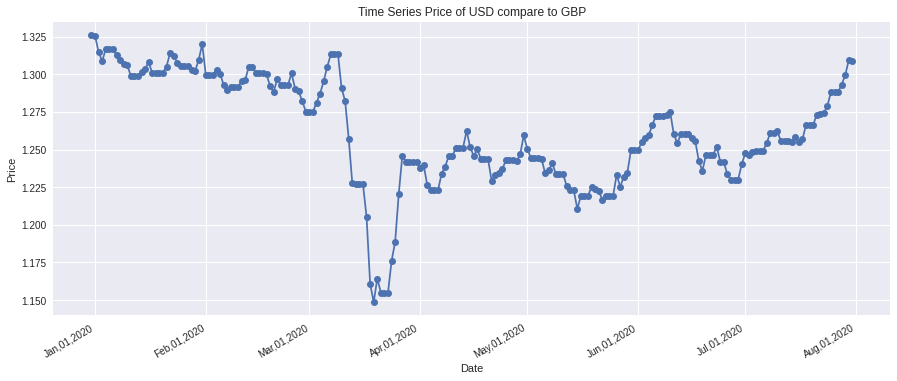

In [4]:
rcParams['figure.figsize'] = 15,6
price = np.array(dataset['Price'])
dates = np.array(dateFormatting['new_date'])
plt.plot_date(dates,price, linestyle ='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%b,%d,%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title('Time Series Price of USD compare to GBP')
plt.xlabel('Date')
plt.ylabel('Price')


# Split train & test set


In [5]:
# Look back leading up to the 7 days before the day we care about
look_back=7
num_samples=len(dataset)-look_back
print('Number of samples: ', num_samples)
# Get indices for new dataset
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(look_back+1).astype(np.int)
# Create the 2D matrix of training samples
data = dataset["Price"].values[indices] 
# Each row represents 7 days in the past
x = data[:,:-1] 
# Each output value represents the 8th day
y = data[:,-1] 

Number of samples:  207


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0, shuffle = False)

In [7]:
x_train.shape, x_test.shape

((165, 7), (42, 7))

In [8]:
y_train.shape, y_test.shape

((165,), (42,))

# Modelling

In [9]:
def get_best_fit_train (pred):
  rcParams['figure.figsize'] = 15,6
  plt.plot(y_train, label = 'y_train')
  plt.plot(pred, label = 'y_pred',color = "red", linewidth=2)
  plt.xlabel('Spot Price Days Input')
  plt.ylabel('Spot Price Output')
  plt.legend()

def get_best_fit_test (pred):
  rcParams['figure.figsize'] = 15,6
  plt.plot(y_test, label = 'y_test')
  plt.plot(pred, label = 'y_pred',color = "red", linewidth=2)
  plt.xlabel('Spot Price Days Input')
  plt.ylabel('Spot Price Output')
  plt.legend()

# Performance Metric


In [10]:
def get_performance_train (model_pred):
  print('Mean Absolute Error:', mean_absolute_error(y_train, model_pred).round(4))  
  print('Mean Squared Error:', mean_squared_error(y_train, model_pred).round(4))
  print('R2_Score:',r2_score(y_train, model_pred).round(4)) 

In [11]:
def get_performance_test (model_pred):
  print('Mean Absolute Error:', mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', mean_squared_error(y_test, model_pred).round(4))  
  print('R2_Score:',r2_score(y_test, model_pred).round(4)) 

# Simple Linear Regression

In [12]:
model_lr=LinearRegression()
model_lr.fit(x_train, y_train)
pred_train_lr= model_lr.predict(x_train)
pred_test_lr= model_lr.predict(x_test)

Text(0.5, 1.0, 'Where Linear Regression Model Train Results Fall on Actual Spot Price')

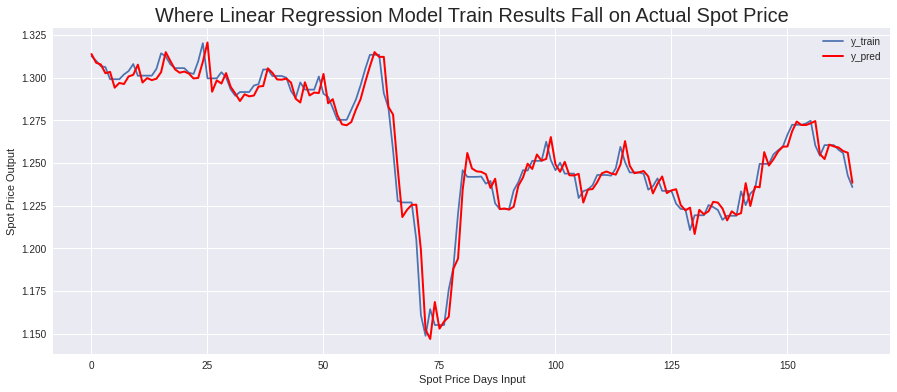

In [13]:
# pred_lr_train = (model_lr.coef_[0] * x_train) + (model_lr.coef_[1] * x_train) + (model_lr.coef_[2]* x_train) + (model_lr.coef_[3] * x_train) + (model_lr.coef_[4]* x_train) + (model_lr.coef_[5] * x_train) + (model_lr.coef_[6]* x_train) + model_lr.intercept_
get_best_fit_train(pred_train_lr)
plt.title('Where Linear Regression Model Train Results Fall on Actual Spot Price', size = 20)

Text(0.5, 1.0, 'Where Linear Regression Model Test Results Fall on Actual Spot Price')

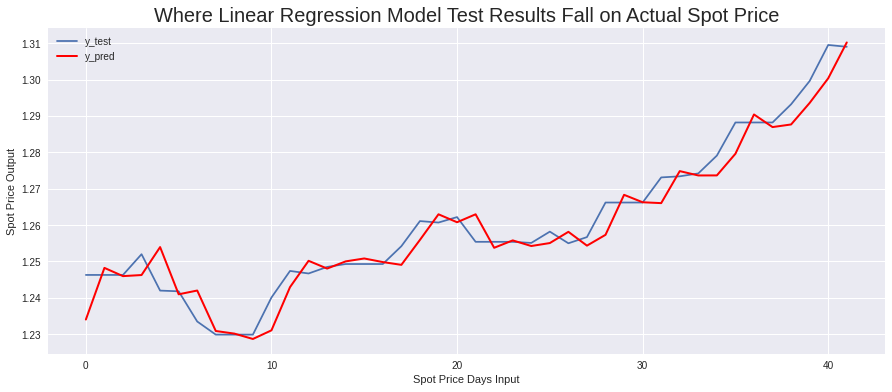

In [14]:
# pred_lr_test = (model_lr.coef_[0] * x_test) + (model_lr.coef_[1] * x_test) + (model_lr.coef_[2]* x_test) + (model_lr.coef_[3] * x_test) + (model_lr.coef_[4]* x_test) + (model_lr.coef_[5] * x_test) + (model_lr.coef_[6]* x_test) + model_lr.intercept_
get_best_fit_test(pred_test_lr)
plt.title('Where Linear Regression Model Test Results Fall on Actual Spot Price', size = 20)


In [15]:
print('Train:')
get_performance_train(pred_train_lr)
print('Test:')
get_performance_test(pred_test_lr)

Train:
Mean Absolute Error: 0.0054
Mean Squared Error: 0.0001
R2_Score: 0.9565
Test:
Mean Absolute Error: 0.0037
Mean Squared Error: 0.0
R2_Score: 0.9373


## Simple Linear Regression Formula

In [16]:
slope = model_lr.coef_[6]
intercept = model_lr.intercept_
print("formula: y = {0} + {1}x".format(intercept,slope))

formula: y = 0.054265169095071064 + 1.2671184009067529x


# Ridge Regression

In [17]:
ridge_model = Ridge(alpha=0.0001)
ridge_model.fit(x_train, y_train) 
pred_train_ridge= ridge_model.predict(x_train)
pred_test_ridge= ridge_model.predict(x_test)


Text(0.5, 1.0, 'Where Ridge Regression Model Train Results Fall on Actual Spot Price')

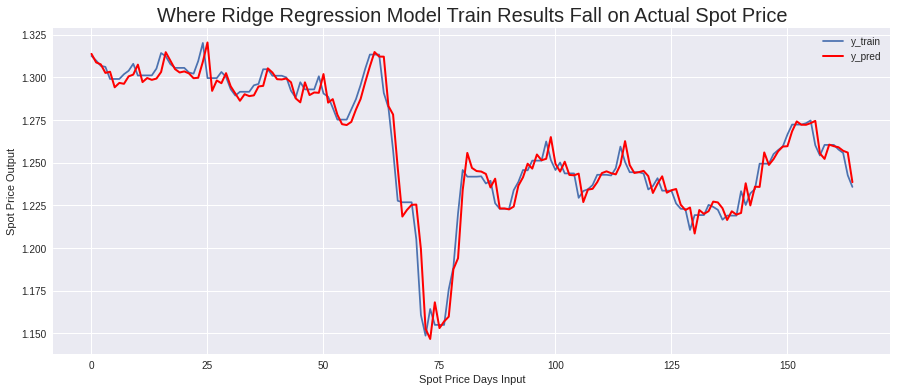

In [18]:
get_best_fit_train(pred_train_ridge)
plt.title('Where Ridge Regression Model Train Results Fall on Actual Spot Price', size = 20)

Text(0.5, 1.0, 'Where Ridge Regression Model Test Results Fall on Actual Spot Price')

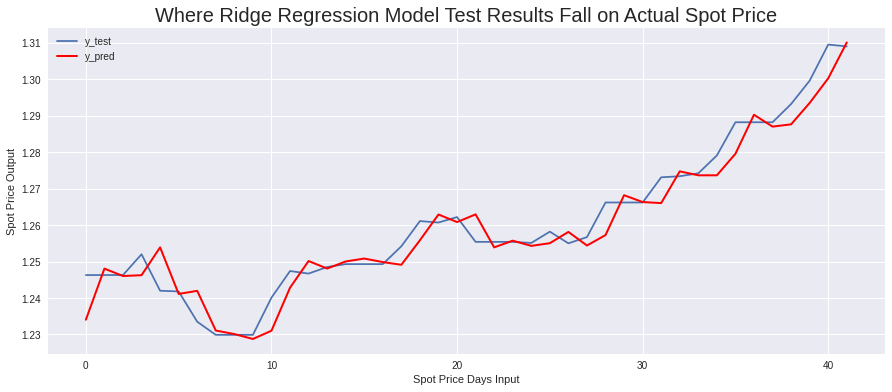

In [19]:
get_best_fit_test(pred_test_ridge)
plt.title('Where Ridge Regression Model Test Results Fall on Actual Spot Price', size = 20)


In [20]:
print('Train:')
get_performance_train(pred_train_ridge)
print('Test:')
get_performance_test(pred_test_ridge)

Train:
Mean Absolute Error: 0.0054
Mean Squared Error: 0.0001
R2_Score: 0.9565
Test:
Mean Absolute Error: 0.0037
Mean Squared Error: 0.0
R2_Score: 0.9373


# Lasso Regression

In [21]:
model_lasso = Lasso(alpha=0.00001)
model_lasso.fit(x_train, y_train)  
pred_train_lasso= model_lasso.predict(x_train)
pred_test_lasso= model_lasso.predict(x_test)


Text(0.5, 1.0, 'Where Lasso Regression Model Train Results Fall on Actual Spot Price')

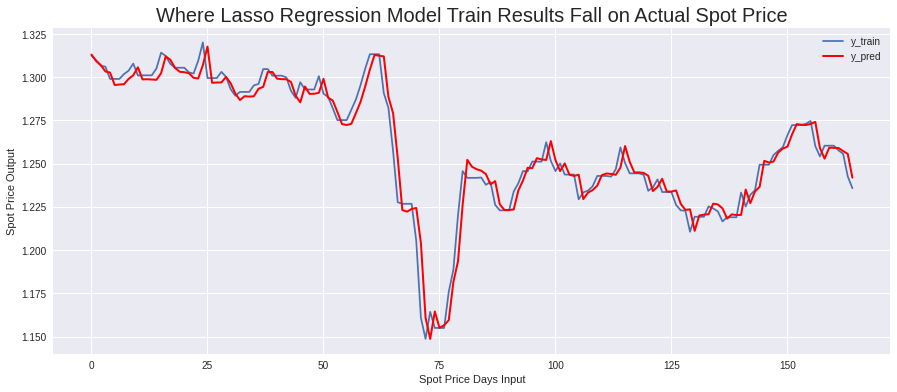

In [22]:
get_best_fit_train(pred_train_lasso)
plt.title(('Where Lasso Regression Model Train Results Fall on Actual Spot Price'), size = 20)

Text(0.5, 1.0, 'Where Lasso Regression Model Test Results Fall on Actual Spot Price')

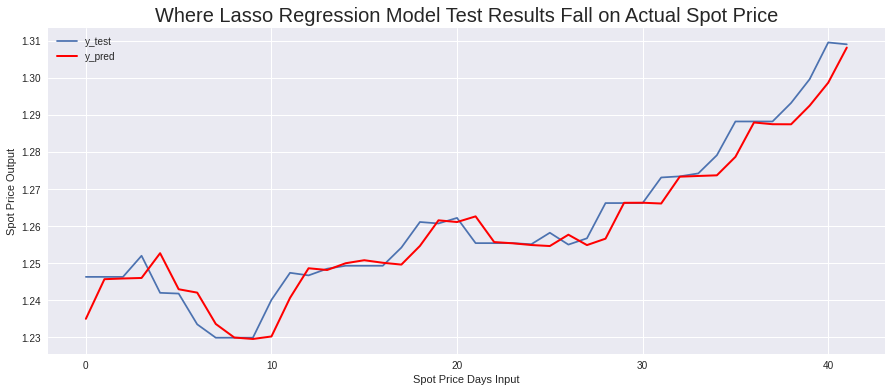

In [23]:
get_best_fit_test(pred_test_lasso)
plt.title('Where Lasso Regression Model Test Results Fall on Actual Spot Price', size = 20)

In [24]:
print('Train:')
get_performance_train(pred_train_lasso)
print('Test:')
get_performance_test(pred_test_lasso)

Train:
Mean Absolute Error: 0.0055
Mean Squared Error: 0.0001
R2_Score: 0.9536
Test:
Mean Absolute Error: 0.0036
Mean Squared Error: 0.0
R2_Score: 0.934


# ElasticNet Regression

In [25]:
model_enet = ElasticNet(alpha = 0.00001)
model_enet.fit(x_train, y_train) 
pred_train_enet= model_enet.predict(x_train)
pred_test_enet= model_enet.predict(x_test)

Text(0.5, 1.0, 'Where ElasticNet Regression Model Train Results Fall on Actual Spot Price')

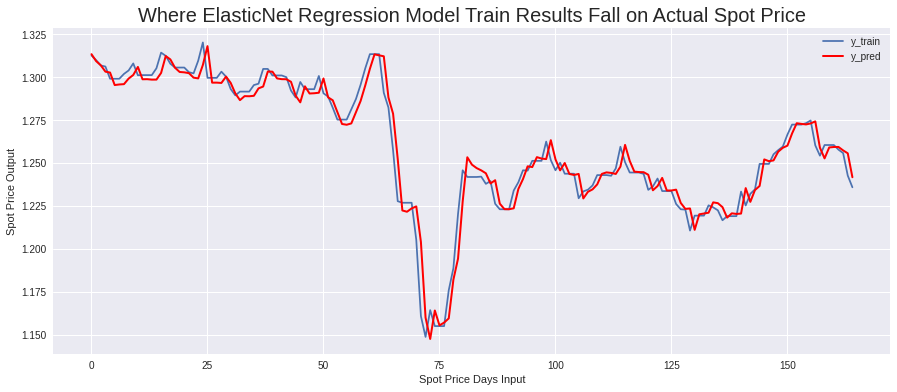

In [26]:
get_best_fit_train(pred_train_enet)
plt.title('Where ElasticNet Regression Model Train Results Fall on Actual Spot Price', size = 20)

Text(0.5, 1.0, 'Where ElasticNet Regression Model Test Results Fall on Actual Spot Price')

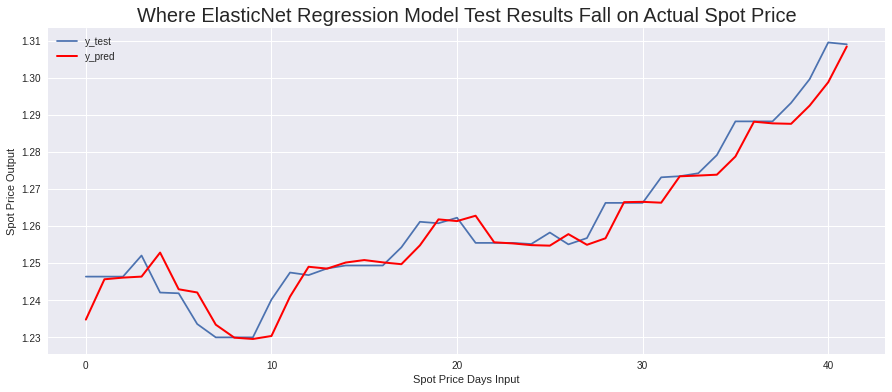

In [27]:
get_best_fit_test(pred_test_enet)
plt.title('Where ElasticNet Regression Model Test Results Fall on Actual Spot Price', size = 20)

In [28]:
print('Train:')
get_performance_train(pred_train_enet)
print('Test:')
get_performance_test(pred_test_enet)

Train:
Mean Absolute Error: 0.0055
Mean Squared Error: 0.0001
R2_Score: 0.954
Test:
Mean Absolute Error: 0.0036
Mean Squared Error: 0.0
R2_Score: 0.9346


# Comparison

### Performance Metrics

In [30]:
print('\nLinear Regression')
print('Train:')
get_performance_train(pred_train_lr)
print('Test:')
get_performance_test(pred_test_lr)
print('\nRidge Regression')
print('Train:')
get_performance_train(pred_train_ridge)
print('Test:')
get_performance_test(pred_test_ridge)
print('\nLasso Regression')
print('Train:')
get_performance_train(pred_train_lasso)
print('Test:')
get_performance_test(pred_test_lasso)
print('\nElasticNet')
print('Train:')
get_performance_train(pred_train_enet)
print('Test:')
get_performance_test(pred_test_enet)


Linear Regression
Train:
Mean Absolute Error: 0.0054
Mean Squared Error: 0.0001
R2_Score: 0.9565
Test:
Mean Absolute Error: 0.0037
Mean Squared Error: 0.0
R2_Score: 0.9373

Ridge Regression
Train:
Mean Absolute Error: 0.0054
Mean Squared Error: 0.0001
R2_Score: 0.9565
Test:
Mean Absolute Error: 0.0037
Mean Squared Error: 0.0
R2_Score: 0.9373

Lasso Regression
Train:
Mean Absolute Error: 0.0055
Mean Squared Error: 0.0001
R2_Score: 0.9536
Test:
Mean Absolute Error: 0.0036
Mean Squared Error: 0.0
R2_Score: 0.934

ElasticNet
Train:
Mean Absolute Error: 0.0055
Mean Squared Error: 0.0001
R2_Score: 0.954
Test:
Mean Absolute Error: 0.0036
Mean Squared Error: 0.0
R2_Score: 0.9346


## Visual Representation

### Train

In [37]:
# We create a dataframe 
compare_models_train=pd.DataFrame({
              "linear reg":np.absolute(y_train-pred_train_lr), 
              "ridge":np.absolute(y_train-pred_train_ridge),
              "lasso":np.absolute(y_train-pred_train_lasso),
              "elasticnet":np.absolute(y_train-pred_train_enet)})

Text(0.5, 0, 'Days')

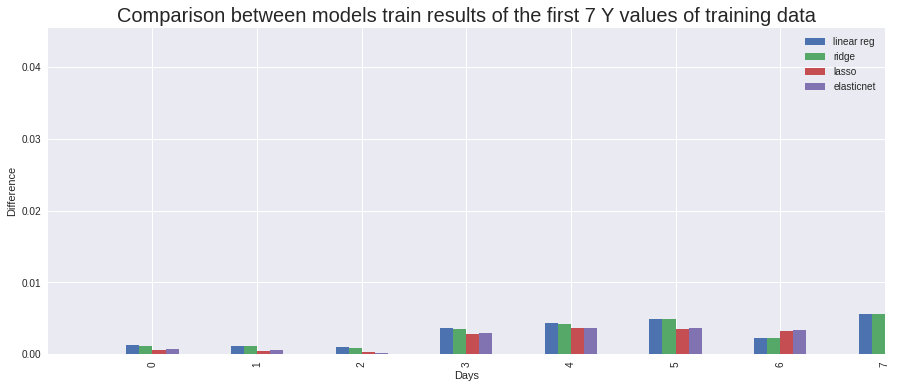

In [38]:
compare_models_train.plot.bar(figsize=(15, 6))
# Last 4 days before splitting test data
plt.xlim(-1,7) # We are looking at the first month of Mondays of our training data
plt.title('Comparison between models train results of the first 7 Y values of training data', size = 20)
plt.ylabel('Difference')
plt.xlabel('Days')

## Test

In [35]:
# We create a dataframe 
compare_models_test=pd.DataFrame({
              "linear reg":np.absolute(y_test-pred_test_lr), 
              "ridge":np.absolute(y_test-pred_test_ridge),
              "lasso":np.absolute(y_test-pred_test_lasso),
              "elasticnet":np.absolute(y_test-pred_test_enet)})

Text(0.5, 0, 'Days')

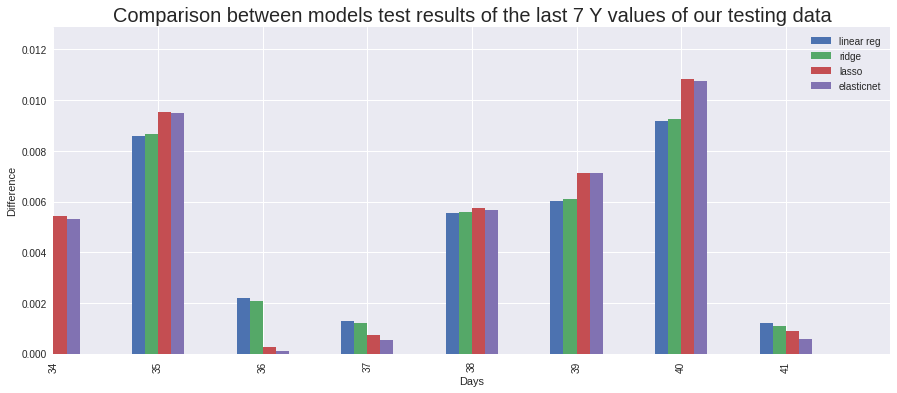

In [36]:
compare_models_test.plot.bar(figsize=(15, 6))
plt.xlim(34,42) # We are looking at the last month of Mondays of our testing data
plt.title('Comparison between models test results of the last 7 Y values of our testing data', size = 20)
plt.ylabel('Difference')
plt.xlabel('Days')